In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import torch
import SimpleITK as sitk
import monai
import glob
from PIL import Image


In [3]:
!pip install miseval

In [5]:
import miseval
from miseval import evaluate

In [100]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        #print(filename)
        if filename != '.DS_Store':
            img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            img = np.array(img)
            img[img==255] =1
            if img is not None:
                images.append(img)
        
        
    return images

def accuracy (TP,FP,TN,FN):
    return (TP + TN)/(TP + TN + FP + FN)

def sensitivity (TP,FP,TN,FN):
    return TP/(TP + FN)

def Specificity (TP,FP,TN,FN):
    return TN/(TN + FP)
    

dice 0.7223333555241551
auc 0.875645597426163
acc 0.9693454742431641
recall 0.7691704076791124
SPE 0.9803833451736707


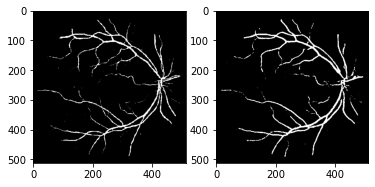

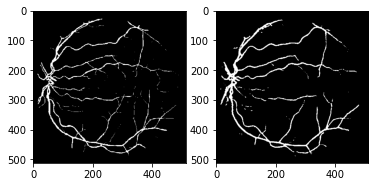

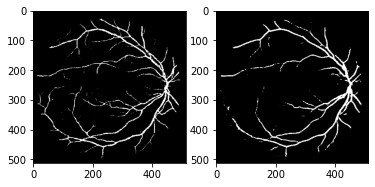

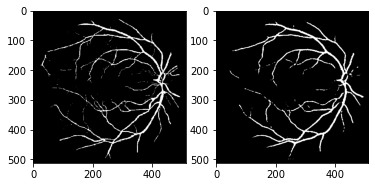

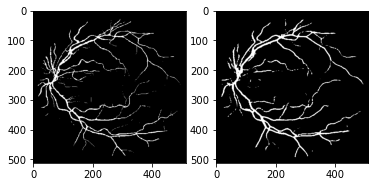

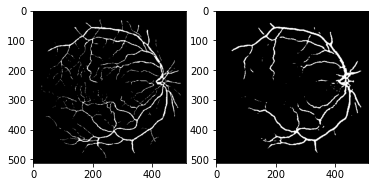

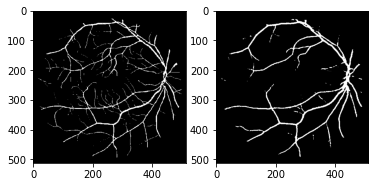

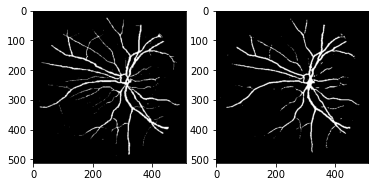

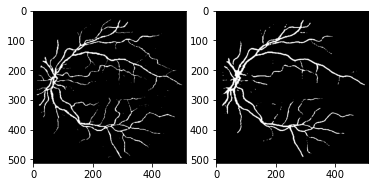

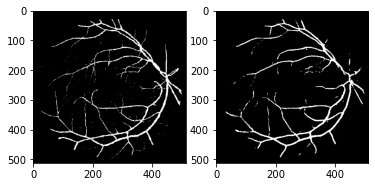

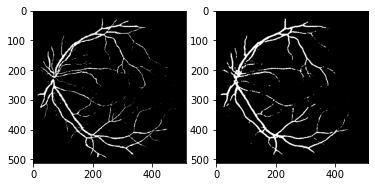

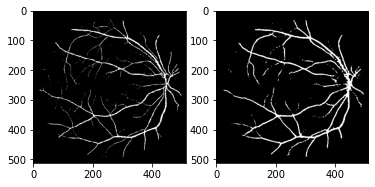

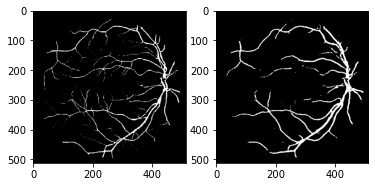

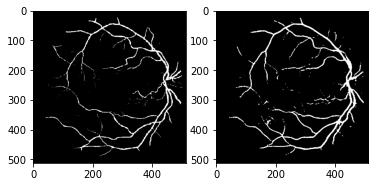

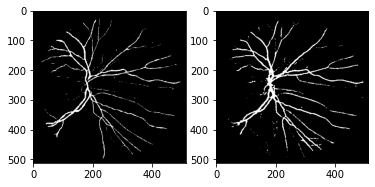

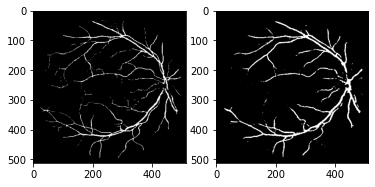

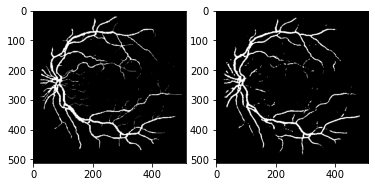

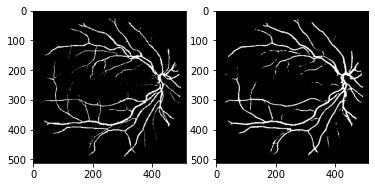

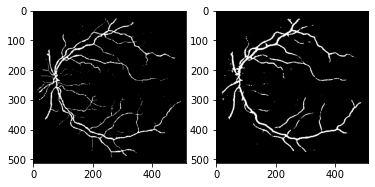

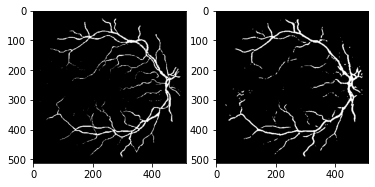

In [80]:
Drive_unet_manual = 'results_drive/1st_manual'
Drive_unet_prediction = 'results_drive/prediction'

D_U_manual =  load_images_from_folder(Drive_unet_manual)
D_U_pre = load_images_from_folder(Drive_unet_prediction)

dice, auc, TP, FP,TN, FN = [0,0,0,0,0,0]
for (manual,pre) in zip(D_U_manual ,D_U_pre ):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(manual, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(pre, cmap='gray')
    dice += evaluate(manual, pre, metric="DSC")
    #print(dice)
    auc += evaluate(manual, pre, metric="AUC")
    TP += evaluate(manual, pre, metric="TP")
    FP += evaluate(manual, pre, metric="FP")
    TN += evaluate(manual, pre, metric="TN")
    FN += evaluate(manual, pre, metric="FN")

dice = dice/len(D_U_manual)
#dice = evaluate(D_U_manual[0], D_U_pre[0], metric="DSC")
auc = auc/len(D_U_manual)
TP = TP/len(D_U_manual)
FP = FP/len(D_U_manual)
TN = TN/len(D_U_manual)
FN = FN/len(D_U_manual)
acc = accuracy (TP,FP,TN,FN)
recall = sensitivity (TP,FP,TN,FN)
SPE = Specificity (TP,FP,TN,FN)
#print(D_U_manual[0].flatten().shape)
#print(D_U_pre[0].shape)
#plt.imshow(D_U_pre[0],cmap='gray')
#plt.imshow(D_U_manual[0],cmap='gray')
#print(D_U_manual[0])
#print(D_U_pre[0])
print("dice",dice)
print("auc",auc)
print("acc",acc)
print("recall",recall)
print("SPE",SPE)

(262144,)
(512, 512)
dice 0.6498760165395077
auc 0.8559566683786771
acc 0.9612892150878907
recall 0.7262369840020202
SPE 0.9740155814826938


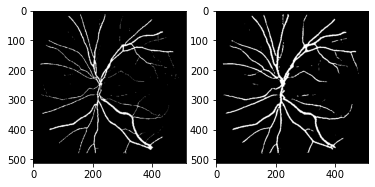

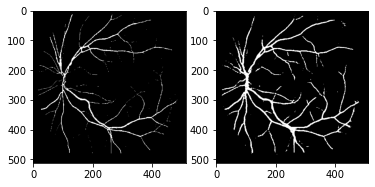

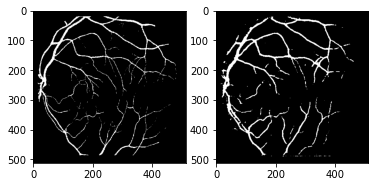

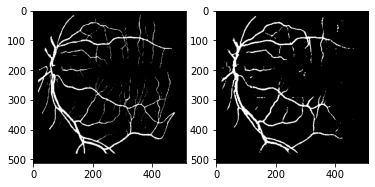

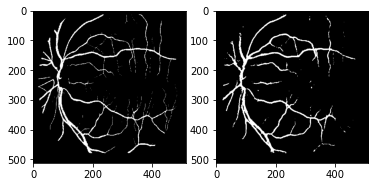

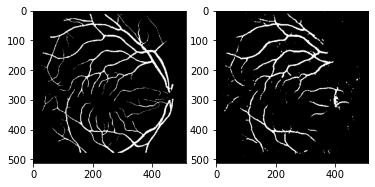

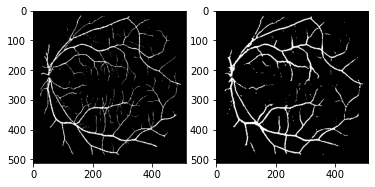

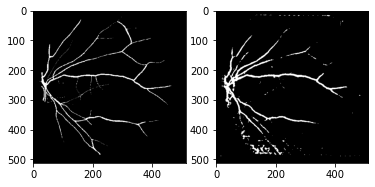

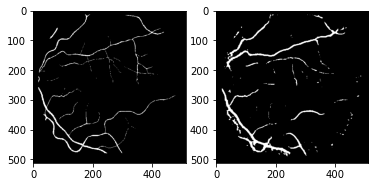

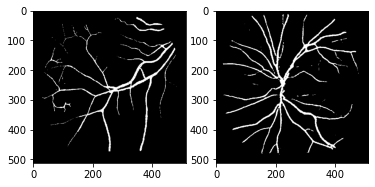

In [111]:
Stare_unet_manual = 'results_STARE/1st_manual'
Stare_unet_prediction = 'results_STARE/prediction'

D_U_manual =  load_images_from_folder(Stare_unet_manual)
D_U_pre = load_images_from_folder(Stare_unet_prediction)

dice, auc, TP, FP,TN, FN = [0,0,0,0,0,0]
for (manual,pre) in zip(D_U_manual ,D_U_pre ):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(manual, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(pre, cmap='gray')
    dice += evaluate(manual, pre, metric="DSC")
    #print(dice)
    auc += evaluate(manual, pre, metric="AUC")
    TP += evaluate(manual, pre, metric="TP")
    FP += evaluate(manual, pre, metric="FP")
    TN += evaluate(manual, pre, metric="TN")
    FN += evaluate(manual, pre, metric="FN")

dice = dice/len(D_U_manual)
#dice = evaluate(D_U_manual[0], D_U_pre[0], metric="DSC")
auc = auc/len(D_U_manual)
TP = TP/len(D_U_manual)
FP = FP/len(D_U_manual)
TN = TN/len(D_U_manual)
FN = FN/len(D_U_manual)
acc = accuracy (TP,FP,TN,FN)
recall = sensitivity (TP,FP,TN,FN)
SPE = Specificity (TP,FP,TN,FN)
print(D_U_manual[0].flatten().shape)
print(D_U_pre[0].shape)
plt.imshow(D_U_pre[0],cmap='gray')
#plt.imshow(D_U_manual[0],cmap='gray')
#print(D_U_manual[0])
#print(D_U_pre[0])
print("dice",dice)
print("auc",auc)
print("acc",acc)
print("recall",recall)
print("SPE",SPE)

In [112]:
def load_images_from_GAN(folder):
    images = []
    for filename in os.listdir(folder):
        #print(filename)
        if filename != '.DS_Store':
            img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            
            img = np.array(img)
            image = np.zeros(img.shape)
            image[img>180] =1
            if image is not None:
                images.append(image)
        
        
    return images

dice 0.7284465026202602
auc 0.8971541723794711
acc 0.9701473236083985
recall 0.823004708783292
SPE 0.978114024540795


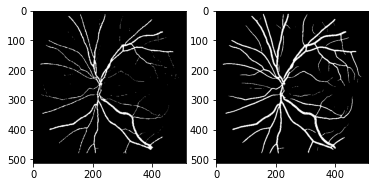

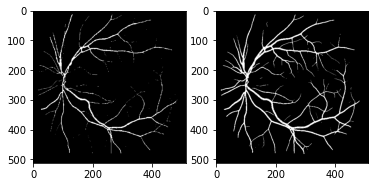

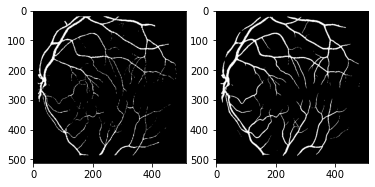

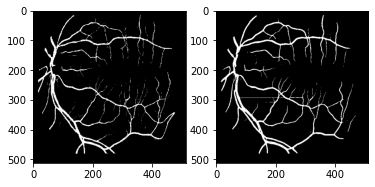

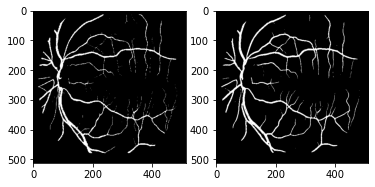

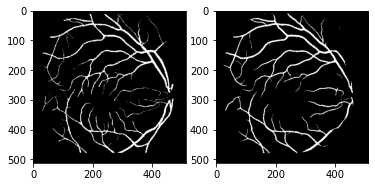

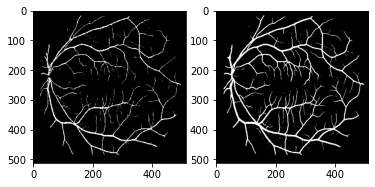

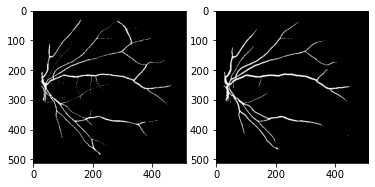

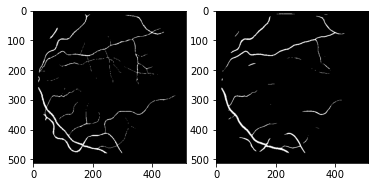

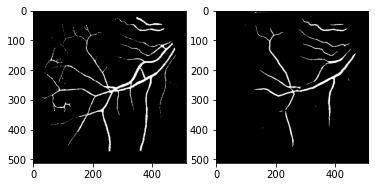

In [113]:
Stare_GAN_manual = 'results_STARE/1st_manual'
Stare_GAN_prediction = 'results_STARE/GAN'

D_U_manual =  load_images_from_folder(Stare_GAN_manual)
D_U_pre = load_images_from_GAN(Stare_GAN_prediction)
#plt.hist(D_U_manual[0])
#np.set_printoptions(threshold=np.inf)
#print(D_U_pre[0])
#plt.imshow(D_U_pre[0],cmap ='gray')
dice, auc, TP, FP,TN, FN = [0,0,0,0,0,0]
for (manual,pre) in zip(D_U_manual ,D_U_pre ):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(manual, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(pre, cmap='gray')
    dice += evaluate(manual, pre, metric="DSC")
    #print(dice)
    auc += evaluate(manual, pre, metric="AUC")
    TP += evaluate(manual, pre, metric="TP")
    FP += evaluate(manual, pre, metric="FP")
    TN += evaluate(manual, pre, metric="TN")
    FN += evaluate(manual, pre, metric="FN")

dice = dice/len(D_U_manual)
#dice = evaluate(D_U_manual[0], D_U_pre[0], metric="DSC")
auc = auc/len(D_U_manual)
TP = TP/len(D_U_manual)
FP = FP/len(D_U_manual)
TN = TN/len(D_U_manual)
FN = FN/len(D_U_manual)
acc = accuracy (TP,FP,TN,FN)
recall = sensitivity (TP,FP,TN,FN)
SPE = Specificity (TP,FP,TN,FN)


print("dice",dice)
print("auc",auc)
print("acc",acc)
print("recall",recall)
print("SPE",SPE)